In [1]:
from bs4 import BeautifulSoup
import urllib.request as REQ
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']=False

In [2]:
nurl = 'http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp?stnId=109'
response = REQ.urlopen(nurl)
soup = BeautifulSoup(response, 'html.parser')
soup

<?xml version="1.0" encoding="utf-8" ?>
<rss version="2.0">
<channel>
<title>기상청 육상 중기예보</title>
<link/>http://www.kma.go.kr/weather/forecast/mid-term_02.jsp
<description>기상청 날씨 웹서비스</description>
<language>ko</language>
<generator>기상청</generator>
<pubdate>2019년 04월 04일 (목)요일 06:00</pubdate>
<item>
<author>기상청</author>
<category>육상중기예보</category>
<title>서울,경기도 육상 중기예보 - 2019년 04월 04일 (목)요일 06:00 발표</title>
<link/>http://www.kma.go.kr/weather/forecast/mid-term_02.jsp
<guid>http://www.kma.go.kr/weather/forecast/mid-term_02.jsp</guid>
<description>
<header>
<title>서울,경기도 육상중기예보</title>
<tm>201904040600</tm>
<wf><![CDATA[이번 예보기간에는 고기압의 영향으로 맑은 날이 많겠습니다. <br />기온은 평년(최저기온: 4~7℃, 최고기온: 15~18℃)과 비슷하겠습니다.  <br />강수량은 평년(1~3mm)보다 적겠습니다.<br />서해중부해상의 물결은 0.5~2.5m로 일겠습니다.]]></wf>
</header>
<body>
<location wl_ver="3">
<province>서울ㆍ인천ㆍ경기도</province>
<city>서울</city>
<data>
<mode>A02</mode>
<tmef>2019-04-07 00:00</tmef>
<wf>구름많음</wf>
<tmn>7</tmn>
<tmx>16</tmx>
<reliability>낮음</reliability>
</data>
<

In [3]:
soup.select('location')

[<location wl_ver="3">
 <province>서울ㆍ인천ㆍ경기도</province>
 <city>서울</city>
 <data>
 <mode>A02</mode>
 <tmef>2019-04-07 00:00</tmef>
 <wf>구름많음</wf>
 <tmn>7</tmn>
 <tmx>16</tmx>
 <reliability>낮음</reliability>
 </data>
 <data>
 <mode>A02</mode>
 <tmef>2019-04-07 12:00</tmef>
 <wf>구름많음</wf>
 <tmn>7</tmn>
 <tmx>16</tmx>
 <reliability>보통</reliability>
 </data>
 <data>
 <mode>A02</mode>
 <tmef>2019-04-08 00:00</tmef>
 <wf>맑음</wf>
 <tmn>5</tmn>
 <tmx>15</tmx>
 <reliability>높음</reliability>
 </data>
 <data>
 <mode>A02</mode>
 <tmef>2019-04-08 12:00</tmef>
 <wf>맑음</wf>
 <tmn>5</tmn>
 <tmx>15</tmx>
 <reliability>높음</reliability>
 </data>
 <data>
 <mode>A02</mode>
 <tmef>2019-04-09 00:00</tmef>
 <wf>맑음</wf>
 <tmn>5</tmn>
 <tmx>16</tmx>
 <reliability>높음</reliability>
 </data>
 <data>
 <mode>A02</mode>
 <tmef>2019-04-09 12:00</tmef>
 <wf>맑음</wf>
 <tmn>5</tmn>
 <tmx>16</tmx>
 <reliability>높음</reliability>
 </data>
 <data>
 <mode>A02</mode>
 <tmef>2019-04-10 00:00</tmef>
 <wf>구름많음</wf>
 <tmn>7</tmn>
 <tm

In [4]:
for location in soup.select('location'):
    print(location.city.string)

서울
인천
수원
파주
이천
평택
백령도
과천
광명
강화
김포
시흥
안산
부천
의정부
고양
양주
동두천
연천
포천
가평
구리
남양주
양평
하남
안양
오산
화성
성남
의왕
군포
안성
용인
광주
여주


In [5]:
# 서울
# =========
# 날짜: 2019-04-07 00:00
# 날씨: 구름 많음
# 최저:7
# 최고:16
# -----------
# 날짜:
# 날씨:
# 최저:
# 최고:
# -----------
# 날짜:
# 날씨:
# 최저:
# 최고:
# -----------
# ...

In [6]:
for location in soup.select('location'):
    print(location.city.string)
    print("=" * 50)
    for data in location.select('data'):
        print('날짜: ' + data.tmef.string)
        print('날씨: ' + data.wf.string)
        print('최저: ' + data.tmn.string)
        print('최고: ' + data.tmx.string)
        print("-" * 50)
    print()

서울
날짜: 2019-04-07 00:00
날씨: 구름많음
최저: 7
최고: 16
--------------------------------------------------
날짜: 2019-04-07 12:00
날씨: 구름많음
최저: 7
최고: 16
--------------------------------------------------
날짜: 2019-04-08 00:00
날씨: 맑음
최저: 5
최고: 15
--------------------------------------------------
날짜: 2019-04-08 12:00
날씨: 맑음
최저: 5
최고: 15
--------------------------------------------------
날짜: 2019-04-09 00:00
날씨: 맑음
최저: 5
최고: 16
--------------------------------------------------
날짜: 2019-04-09 12:00
날씨: 맑음
최저: 5
최고: 16
--------------------------------------------------
날짜: 2019-04-10 00:00
날씨: 구름많음
최저: 7
최고: 16
--------------------------------------------------
날짜: 2019-04-10 12:00
날씨: 구름많음
최저: 7
최고: 16
--------------------------------------------------
날짜: 2019-04-11 00:00
날씨: 구름많음
최저: 7
최고: 16
--------------------------------------------------
날짜: 2019-04-11 12:00
날씨: 맑음
최저: 7
최고: 16
--------------------------------------------------
날짜: 2019-04-12 00:00
날씨: 맑음
최저: 8
최고: 17
--------------------------

날씨: 구름많음
최저: 6
최고: 16
--------------------------------------------------
날짜: 2019-04-07 12:00
날씨: 구름많음
최저: 6
최고: 16
--------------------------------------------------
날짜: 2019-04-08 00:00
날씨: 맑음
최저: 3
최고: 15
--------------------------------------------------
날짜: 2019-04-08 12:00
날씨: 맑음
최저: 3
최고: 15
--------------------------------------------------
날짜: 2019-04-09 00:00
날씨: 맑음
최저: 4
최고: 17
--------------------------------------------------
날짜: 2019-04-09 12:00
날씨: 맑음
최저: 4
최고: 17
--------------------------------------------------
날짜: 2019-04-10 00:00
날씨: 구름많음
최저: 6
최고: 14
--------------------------------------------------
날짜: 2019-04-10 12:00
날씨: 구름많음
최저: 6
최고: 14
--------------------------------------------------
날짜: 2019-04-11 00:00
날씨: 구름많음
최저: 5
최고: 16
--------------------------------------------------
날짜: 2019-04-11 12:00
날씨: 맑음
최저: 5
최고: 16
--------------------------------------------------
날짜: 2019-04-12 00:00
날씨: 맑음
최저: 5
최고: 17
--------------------------------------------------

In [7]:
kdata = []
for location in soup.select('location'):
    for data in location.select('data'):
        kdata.append({'도시': location.city.string,
                     '날짜': data.tmef.string,
                     '날씨': data.wf.string,
                     '최저': int(data.tmn.string),
                     '최고': int(data.tmx.string)})
kdata

[{'도시': '서울', '날짜': '2019-04-07 00:00', '날씨': '구름많음', '최저': 7, '최고': 16},
 {'도시': '서울', '날짜': '2019-04-07 12:00', '날씨': '구름많음', '최저': 7, '최고': 16},
 {'도시': '서울', '날짜': '2019-04-08 00:00', '날씨': '맑음', '최저': 5, '최고': 15},
 {'도시': '서울', '날짜': '2019-04-08 12:00', '날씨': '맑음', '최저': 5, '최고': 15},
 {'도시': '서울', '날짜': '2019-04-09 00:00', '날씨': '맑음', '최저': 5, '최고': 16},
 {'도시': '서울', '날짜': '2019-04-09 12:00', '날씨': '맑음', '최저': 5, '최고': 16},
 {'도시': '서울', '날짜': '2019-04-10 00:00', '날씨': '구름많음', '최저': 7, '최고': 16},
 {'도시': '서울', '날짜': '2019-04-10 12:00', '날씨': '구름많음', '최저': 7, '최고': 16},
 {'도시': '서울', '날짜': '2019-04-11 00:00', '날씨': '구름많음', '최저': 7, '최고': 16},
 {'도시': '서울', '날짜': '2019-04-11 12:00', '날씨': '맑음', '최저': 7, '최고': 16},
 {'도시': '서울', '날짜': '2019-04-12 00:00', '날씨': '맑음', '최저': 8, '최고': 17},
 {'도시': '서울', '날짜': '2019-04-13 00:00', '날씨': '맑음', '최저': 8, '최고': 18},
 {'도시': '서울', '날짜': '2019-04-14 00:00', '날씨': '맑음', '최저': 8, '최고': 17},
 {'도시': '인천', '날짜': '2019-04-07 00:00', '날씨': '구름많음', 

In [8]:
df = pd.DataFrame(kdata)
df

,날씨,날짜,도시,최고,최저
0,구름많음,2019-04-07 00:00,서울,16,7
1,구름많음,2019-04-07 12:00,서울,16,7
2,맑음,2019-04-08 00:00,서울,15,5
3,맑음,2019-04-08 12:00,서울,15,5
4,맑음,2019-04-09 00:00,서울,16,5
5,맑음,2019-04-09 12:00,서울,16,5
6,구름많음,2019-04-10 00:00,서울,16,7
7,구름많음,2019-04-10 12:00,서울,16,7
8,구름많음,2019-04-11 00:00,서울,16,7
9,맑음,2019-04-11 12:00,서울,16,7


In [9]:
df['최고'] = df['최고'].apply(lambda v : int(v))
df['최저'] = df['최저'].apply(lambda v : int(v))
df

,날씨,날짜,도시,최고,최저
0,구름많음,2019-04-07 00:00,서울,16,7
1,구름많음,2019-04-07 12:00,서울,16,7
2,맑음,2019-04-08 00:00,서울,15,5
3,맑음,2019-04-08 12:00,서울,15,5
4,맑음,2019-04-09 00:00,서울,16,5
5,맑음,2019-04-09 12:00,서울,16,5
6,구름많음,2019-04-10 00:00,서울,16,7
7,구름많음,2019-04-10 12:00,서울,16,7
8,구름많음,2019-04-11 00:00,서울,16,7
9,맑음,2019-04-11 12:00,서울,16,7


In [10]:
g = df.groupby('도시')
type(g)

pandas.core.groupby.generic.DataFrameGroupBy

In [11]:
g.mean()[['최저', '최고']]

,최저,최고
도시,,
가평,1.461538,16.692308
강화,4.153846,14.692308
고양,4.615385,16.153846
과천,4.615385,16.230769
광명,6.846154,16.000000
광주,3.692308,17.153846
구리,5.076923,16.000000
군포,5.615385,15.692308
김포,4.769231,14.846154


In [12]:
df

,날씨,날짜,도시,최고,최저
0,구름많음,2019-04-07 00:00,서울,16,7
1,구름많음,2019-04-07 12:00,서울,16,7
2,맑음,2019-04-08 00:00,서울,15,5
3,맑음,2019-04-08 12:00,서울,15,5
4,맑음,2019-04-09 00:00,서울,16,5
5,맑음,2019-04-09 12:00,서울,16,5
6,구름많음,2019-04-10 00:00,서울,16,7
7,구름많음,2019-04-10 12:00,서울,16,7
8,구름많음,2019-04-11 00:00,서울,16,7
9,맑음,2019-04-11 12:00,서울,16,7


In [13]:

df[(df['도시'] == '서울') & (df['날씨'] == '맑음')][['날짜', '날씨', '최저', '최고']]

,날짜,날씨,최저,최고
2,2019-04-08 00:00,맑음,5,15
3,2019-04-08 12:00,맑음,5,15
4,2019-04-09 00:00,맑음,5,16
5,2019-04-09 12:00,맑음,5,16
9,2019-04-11 12:00,맑음,7,16
10,2019-04-12 00:00,맑음,8,17
11,2019-04-13 00:00,맑음,8,18
12,2019-04-14 00:00,맑음,8,17


In [14]:
# df[(df['도시'] == '수원')]['최저'].apply(lambda v: '쌀쌀' if v <= 5 else '온화')
df['느낌'] = df[(df['도시'] == '수원')]['최저'].apply(lambda v: '쌀쌀' if v <= 5 else '온화')
df[df['도시'] == '수원']

,날씨,날짜,도시,최고,최저,느낌
26,구름많음,2019-04-07 00:00,수원,16,6,온화
27,구름많음,2019-04-07 12:00,수원,16,6,온화
28,맑음,2019-04-08 00:00,수원,15,3,쌀쌀
29,맑음,2019-04-08 12:00,수원,15,3,쌀쌀
30,맑음,2019-04-09 00:00,수원,17,3,쌀쌀
31,맑음,2019-04-09 12:00,수원,17,3,쌀쌀
32,구름많음,2019-04-10 00:00,수원,16,5,쌀쌀
33,구름많음,2019-04-10 12:00,수원,16,5,쌀쌀
34,구름많음,2019-04-11 00:00,수원,16,5,쌀쌀
35,맑음,2019-04-11 12:00,수원,16,5,쌀쌀


In [15]:
# df[df['최고'] == df['최고'].max()][['날짜', '날씨', '최고', '최저']]
df.query('최고==%d' % df['최고'].max())

,날씨,날짜,도시,최고,최저,느낌
272,맑음,2019-04-14 00:00,가평,19,4,NaN
298,맑음,2019-04-14 00:00,남양주,19,4,NaN
311,맑음,2019-04-14 00:00,양평,19,5,NaN
324,맑음,2019-04-14 00:00,하남,19,5,NaN
374,맑음,2019-04-12 00:00,성남,19,6,NaN
375,맑음,2019-04-13 00:00,성남,19,6,NaN
376,맑음,2019-04-14 00:00,성남,19,7,NaN
441,맑음,2019-04-14 00:00,광주,19,5,NaN


In [16]:
graph = df[(df['도시'] == '평택')][['날짜', '최고', '최저']]
graph.set_index('날짜', inplace=True)
graph

,최고,최저
날짜,,
2019-04-07 00:00,16,6
2019-04-07 12:00,16,6
2019-04-08 00:00,15,3
2019-04-08 12:00,15,3
2019-04-09 00:00,17,3
2019-04-09 12:00,17,3
2019-04-10 00:00,16,5
2019-04-10 12:00,16,5
2019-04-11 00:00,16,5


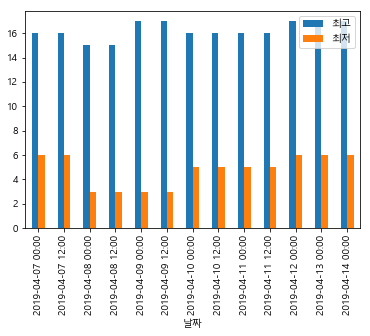

In [17]:
graph.plot(kind='bar')
plt.show()

In [18]:
df = pd.DataFrame(kdata)
df

,날씨,날짜,도시,최고,최저
0,구름많음,2019-04-07 00:00,서울,16,7
1,구름많음,2019-04-07 12:00,서울,16,7
2,맑음,2019-04-08 00:00,서울,15,5
3,맑음,2019-04-08 12:00,서울,15,5
4,맑음,2019-04-09 00:00,서울,16,5
5,맑음,2019-04-09 12:00,서울,16,5
6,구름많음,2019-04-10 00:00,서울,16,7
7,구름많음,2019-04-10 12:00,서울,16,7
8,구름많음,2019-04-11 00:00,서울,16,7
9,맑음,2019-04-11 12:00,서울,16,7


In [19]:
df = df.pivot_table( index=['도시', '날짜'] )
df

최고  최저
도시 날짜                      
가평 2019-04-07 00:00  18   1
   2019-04-07 12:00  18   1
   2019-04-08 00:00  15   0
   2019-04-08 12:00  15   0
   2019-04-09 00:00  17   0
   2019-04-09 12:00  17   0
   2019-04-10 00:00  14   3
   2019-04-10 12:00  14   3
   2019-04-11 00:00  17   2
   2019-04-11 12:00  17   2
   2019-04-12 00:00  18   1
   2019-04-13 00:00  18   2
   2019-04-14 00:00  19   4
강화 2019-04-07 00:00  15   5
   2019-04-07 12:00  15   5
   2019-04-08 00:00  13   3
   2019-04-08 12:00  13   3
   2019-04-09 00:00  16   3
   2019-04-09 12:00  16   3
   2019-04-10 00:00  13   5
   2019-04-10 12:00  13   5
   2019-04-11 00:00  15   4
   2019-04-11 12:00  15   4
   2019-04-12 00:00  15   4
   2019-04-13 00:00  15   5
   2019-04-14 00:00  17   5
고양 2019-04-07 00:00  16   6
   2019-04-07 12:00  16   6
   2019-04-08 00:00  15   3
   2019-04-08 12:00  15   3
...                  ..  ..
포천 2019-04-11 12:00  16   3
   2019-04-12 00:00  17   2
   2019-04-13 00:00  17   3
   2019-04-14 00:00  18   5
하남 2019-04-07 00:00  16   6
   2019-04-07 12:00  16   6
   2019-04-08 00:00  15   3
   2019-04-08 12:00  15   3
   2019-04-09 00:00  17   2
   2019-04-09 12:00  17   2
   2019-04-10 00:00  14   6
   2019-04-10 12:00  14   6
   2019-04-11 00:00  17   4
   2019-04-11 12:00  17   4
   2019-04-12 00:00  18   4
   2019-04-13 00:00  17   5
   2019-04-14 00:00  19   5
화성 2019-04-07 00:00  14   6
   2019-04-07 12:00  14   6
   2019-04-08 00:00  14   3
   2019-04-08 12:00  14   3
   2019-04-09 00:00  17   3
   2019-04-09 12:00  17   3
   2019-04-10 00:00  13   6
   2019-04-10 12:00  13   6
   2019-04-11 00:00  15   5
   2019-04-11 12:00  15   5
   2019-04-12 00:00  16   4
   2019-04-13 00:00  16   5
   2019-04-14 00:00  17   5

[455 rows x 2 columns]

In [21]:
mdf = df
mdf.loc['서울']

,최고,최저
날짜,,
2019-04-07 00:00,16,7
2019-04-07 12:00,16,7
2019-04-08 00:00,15,5
2019-04-08 12:00,15,5
2019-04-09 00:00,16,5
2019-04-09 12:00,16,5
2019-04-10 00:00,16,7
2019-04-10 12:00,16,7
2019-04-11 00:00,16,7
